# Homework Assignment Number One

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Section 1: Police killings

In [3]:
killings = pd.read_csv('../data/police-killings.csv', encoding='cp1252', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [4]:
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.head()

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 2. Show the count of missing values in each column

In [5]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [6]:
killings = killings.fillna("unknown")

### 4. How many killings were there in March and April?

In [7]:
killings.month.value_counts()['March'] + killings.month.value_counts()['April']


210

### 5. How many male and how many female victims are there?

In [8]:
#male = killings.gender.apply(lambda x:"Male" in x).sum()
#female = killings.gender.apply(lambda x:"Female" in x).sum()

#print (male)
#print (female)
male = killings.gender.value_counts()['Male']
female = killings.gender.value_counts()['Female']
print (male)
print (female)

445
22


### 6. How many killings were of unarmed people?

In [9]:
#killings.armed.apply(lambda x:"No" in x).sum()
#CHECK WHY LAMBDA GIVES A DIFFERENT ANSWER
killings.armed.value_counts()['No']


102

### 7. What percentage of all killings were unarmed?

In [10]:
killings.armed.value_counts(normalize=True)["No"]*100

21.841541755888652

### 8. What are the 5 states with the most killings?

In [11]:
killings.groupby("state")["name"].count().sort_values(ascending=False).head()

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: name, dtype: int64

### 9. Show a value counts of deaths for each race

In [12]:
killings.groupby("race")["name"].count()


race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: name, dtype: int64

### 10. Display a histogram of ages of all killings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025720E85E80>]], dtype=object)

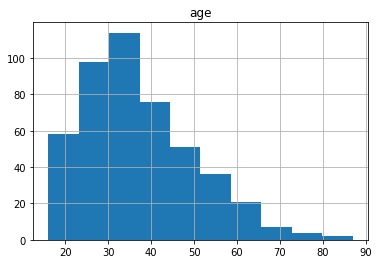

In [13]:
killings.hist("age")

### 11. Show histogram of ages for each race

race
Asian/Pacific Islander    AxesSubplot(0.125,0.125;0.775x0.755)
Black                     AxesSubplot(0.125,0.125;0.775x0.755)
Hispanic/Latino           AxesSubplot(0.125,0.125;0.775x0.755)
Native American           AxesSubplot(0.125,0.125;0.775x0.755)
Unknown                   AxesSubplot(0.125,0.125;0.775x0.755)
White                     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

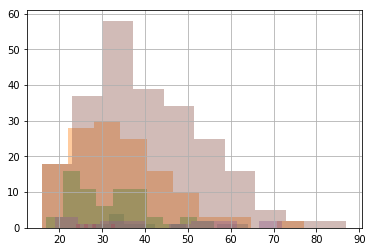

In [47]:
#NOT DONE
killings.groupby("race")["age"].hist(alpha=0.4)


### 12. What is the average age of death by race?

In [15]:
killings.groupby("race")["age"].mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

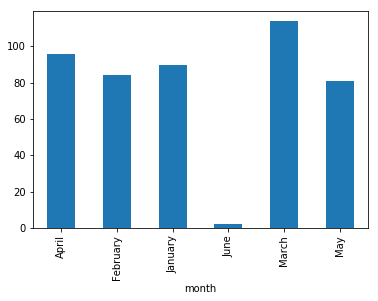

In [16]:
monthly_kills = killings.groupby("month")["name"].count()
monthly_kills.plot(kind="bar")


## Section 2: College Majors

In [50]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [51]:
majors.drop(majors.columns[[0,5]],axis=1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [48]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [20]:
majors.groupby("Major")["P75th"].max().sort_values(ascending=False).head(10)

Major
PETROLEUM ENGINEERING                                  210000.0
MATHEMATICS AND COMPUTER SCIENCE                       136000.0
NUCLEAR ENGINEERING                                    128000.0
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    125000.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING              125000.0
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                 125000.0
MINING AND MINERAL ENGINEERING                         124000.0
METALLURGICAL ENGINEERING                              123000.0
CHEMICAL ENGINEERING                                   120000.0
ELECTRICAL ENGINEERING                                 116000.0
Name: P75th, dtype: float64

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


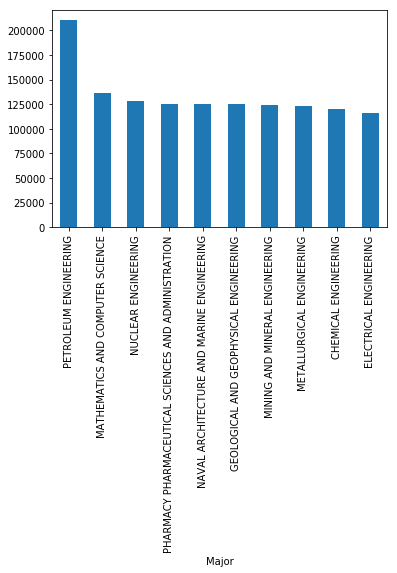

In [21]:
top_majors = majors.groupby("Major")["P75th"].max().sort_values(ascending=False).head(10)
top_majors.plot(x = "Major", y = "Salary", kind = "bar")

### 5. What is the average median salary for each major category?

In [22]:
majors.groupby("Major")["Median"].mean().sort_values(ascending=False)


Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
COMPUTER ENGINEERING                                    80000
ASTRONOMY AND ASTROPHYSICS                              80000
MECHANICAL ENGINEERING                                  80000
AEROSPACE ENGINEERING                                   80000
ARCHITECTURAL ENGINEERING                               78000
MATERIALS ENGINEERING AND MATERIALS SCIENCE             78000
CO

### 6. Visualize only the top 5 paying major categories

In [23]:
majors.groupby("Major")["Median"].mean().sort_values(ascending=False).head()

Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
Name: Median, dtype: int64

### 7. Plot a histogram of the distribution of median salaries

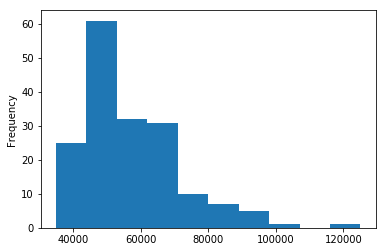

In [24]:
median = majors.groupby("Major")["Median"].mean()
median.plot(kind="hist")

### 8. Plot a histogram of the distribution of median salaries by major category

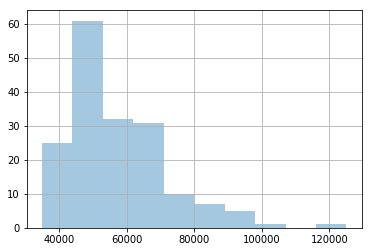

In [53]:
majors.groupby("Major")["Median"].mean().hist(alpha=0.4)


### 9. What are the top 10 most UNemployed majors?

In [26]:
majors.groupby("Major")["Unemployed"].max().sort_values(ascending=False).head(10)

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [27]:
majors.groupby("Major_category")["Unemployed"].mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [28]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [29]:
fifa.columns = fifa.columns.str.lower()

fifa.drop(['national_position', 'national_kit', 'club_kit', 'club_joining', 'contract_expiry'],axis=1, inplace=True)
fifa=fifa[(fifa['club_position']!="GK")&(fifa['rating']>70)]
fifa["height"]=fifa.height.str.replace("cm","")
fifa["weight"]=fifa.weight.str.replace("kg","")
fifa["height"] = fifa.height.astype(float)
fifa["weight"] = fifa.weight.astype(float)

for col in fifa.columns:
    if 'gk' in col:
        del fifa[col]
        
fifa.dropna(inplace=True)
fifa.set_index("name", inplace=True)
fifa

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,78,84,85,86,91,82,77,76,81,86
Gareth Bale,Wales,Real Madrid,RW,90,183.0,74.0,Left,07/16/1989,27,RW,...,77,85,86,91,87,90,86,85,76,76
Zlatan Ibrahimović,Sweden,Manchester Utd,ST,90,195.0,95.0,Right,10/03/1981,35,ST,...,86,72,80,93,90,88,82,82,91,93
Jérôme Boateng,Germany,FC Bayern,Sub,89,192.0,90.0,Right,09/03/1988,28,CB,...,58,75,86,79,34,58,56,31,46,53
Eden Hazard,Belgium,Chelsea,LW,89,173.0,74.0,Right,01/07/1991,26,LW/LM,...,92,59,57,79,81,82,82,79,86,79


### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [30]:
fifa['total'] = fifa['speed']+fifa['marking']+fifa['finishing']
fifa.groupby("name")["total"].max().sort_values(ascending=False).head()

name
Jordi Alba             247
Mario Gaspar           235
Igor Smolnikov         234
Alessandro Florenzi    233
Gareth Bale            233
Name: total, dtype: int64

### 3. Who is the tallest French lefted foot player?

In [31]:
fifa_french = fifa[((fifa.nationality == "France") & (fifa.preffered_foot== "Left"))]
fifa_french.groupby("name")["height"].max().sort_values(ascending=False).head(1)

name
Romain Thomas    193.0
Name: height, dtype: float64

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [32]:
fifa_corr = fifa.corr()
fifa_corr['rating']

rating                1.000000
height                0.037103
weight                0.043397
age                   0.024665
weak_foot             0.131141
skill_moves           0.192981
ball_control          0.308440
dribbling             0.237897
marking               0.051587
sliding_tackle        0.078400
standing_tackle       0.093631
aggression            0.125627
reactions             0.676375
attacking_position    0.202557
interceptions         0.108552
vision                0.290549
composure             0.422259
crossing              0.192792
short_pass            0.347934
long_pass             0.286491
acceleration          0.126065
speed                 0.129539
stamina               0.160307
strength              0.096064
balance               0.077367
agility               0.138037
jumping               0.091926
heading               0.158083
shot_power            0.228799
finishing             0.203217
long_shots            0.209869
curve                 0.226129
freekick

### 5. Make a heatmap of the dataset's correlation table

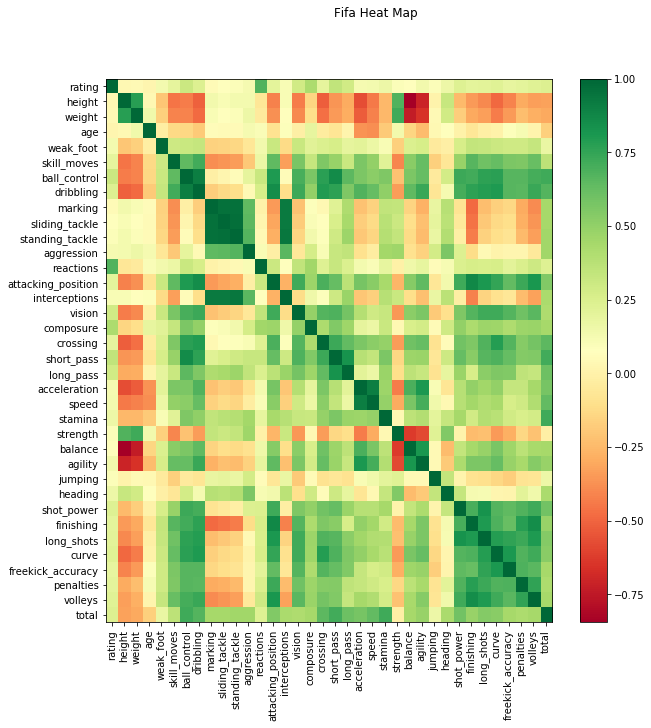

In [33]:
corr = fifa.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Fifa Heat Map')
plt.show()

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [34]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [35]:
fifa2 = fifa[fifa.club.isin(clubs_list)]
fifa2.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys,total
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,95,85,92,93,90,81,76,85,88,207
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,68,71,85,95,88,89,90,74,85,195
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,61,62,78,89,77,79,84,81,83,200
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,69,77,87,94,86,86,84,85,88,201
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,84,85,86,91,82,77,76,81,86,198


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

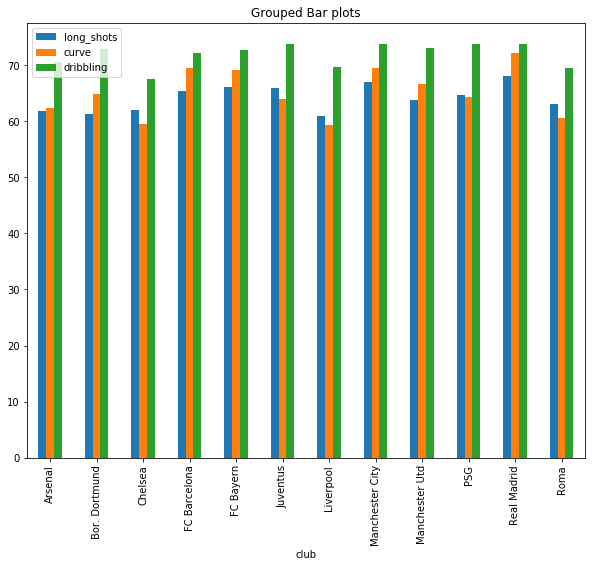

In [36]:
cols=["long_shots","curve","dribbling"]

fifa2.groupby("club")[cols].mean().plot(kind="bar", figsize=(10,8), 
                                           title = "Grouped Bar plots")
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

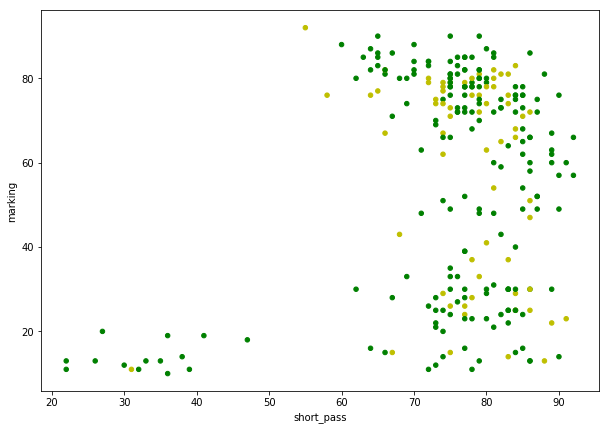

In [37]:
color_dict = {"Left":"y", "Right":"g"}
colors = fifa2.preffered_foot.map(color_dict)
fifa2.plot(x="short_pass", y = "marking", kind="scatter", figsize=(10, 7), c = colors)
plt.show()


### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

In [38]:
#Dribbling boxplot

Which position is better at dribbling? ST or RCM? Why?

C:\Users\annek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


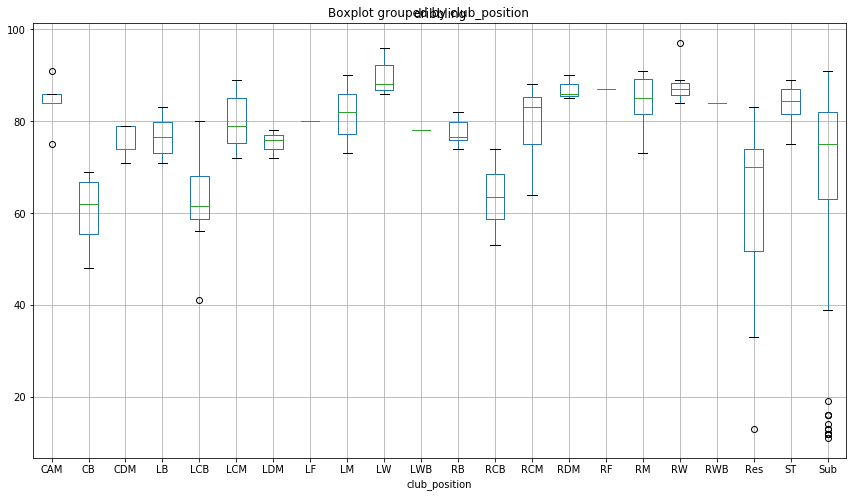

In [39]:
fifa2.boxplot(column="dribbling",by="club_position", figsize=(12, 7))
plt.tight_layout()
#ST is better at dribbling. ST's median is higher than RCM's, and the upper quartile is also higher. 
#RCM's median is lower and its lower quartile is bigger than it's uppper quartile and overall has a bigger range.

In [40]:
#Balance boxplot

Which position is better at balance? LM or LDM? Why?

C:\Users\annek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


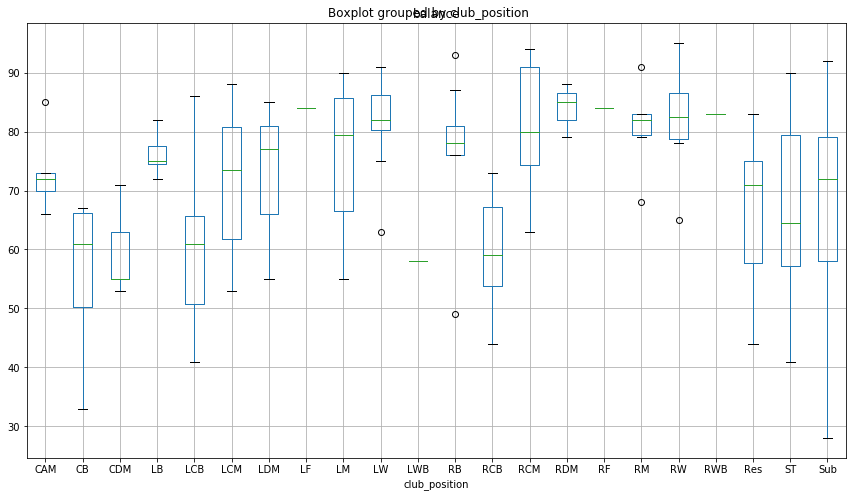

In [41]:
fifa2.boxplot(column="balance",by="club_position", figsize=(12, 7))
plt.tight_layout()
#

In [42]:
#sliding_tackle boxplot

What is the IQR for positions ST, RB, and RM?

C:\Users\annek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


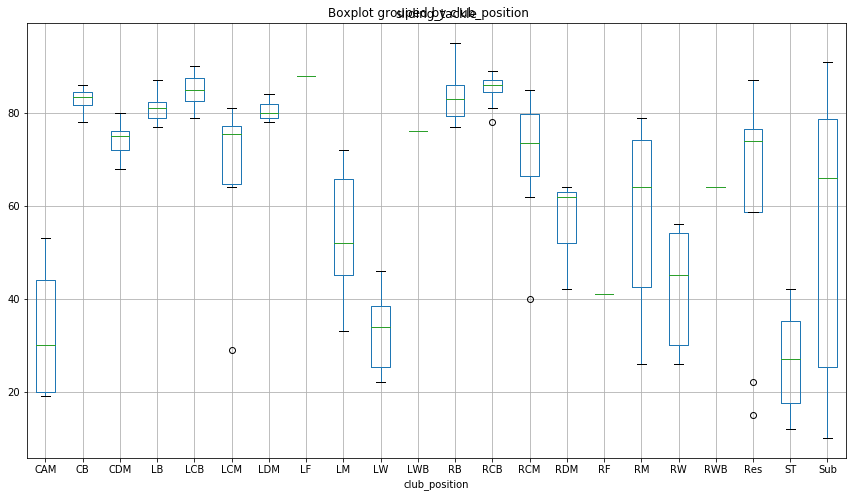

In [43]:
fifa2.boxplot(column="sliding_tackle",by="club_position", figsize=(12, 7))
plt.tight_layout()